In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [224]:
df = pd.read_csv("netflix_titles.csv")
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [225]:
df.drop("show_id",axis=1,inplace=True)
df.drop("description", axis=1, inplace=True)

In [226]:
# df.columns
df.isnull().sum()

type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
dtype: int64

In [227]:
country_count = df["country"].mode()[0]
cast_count = df["cast"].mode()[0]
director_count = df["director"].mode()[0]
date_added_count = df["date_added"].mode()[0]
duration_count = df["duration"].mode()[0]

In [228]:
df["country"]=df["country"].fillna(country_count)
df["cast"]=df["cast"].fillna("Not Mentioned")
df["director"]=df["director"].fillna("Not Mentioned")
df["date_added"]=df["date_added"].fillna(date_added_count)
df["duration"]=df["duration"].fillna(duration_count)

In [229]:
df.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          4
duration        0
listed_in       0
dtype: int64

In [230]:
df.columns

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [231]:
df["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [232]:
df = df[~df["rating"].str.contains("min", na=False)]

In [233]:
df["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', nan, 'TV-Y7-FV', 'UR'], dtype=object)

In [234]:
df["date_added"] = df["date_added"].str.replace(","," ")

In [235]:
df["date_added"] = pd.to_datetime(df["date_added"],format="mixed")

In [236]:
df["year"] = df["date_added"].dt.year

In [237]:
df["month"] = df["date_added"].dt.month_name()

In [238]:
df["date"] = df["date_added"].dt.day

In [239]:
df["genre"] = df["listed_in"].str.split(",").str[0]

In [240]:
df["lead_actor"] = df["cast"].str.split(",").str[0]

In [241]:
df = df[df["cast"]!="Not Mentioned"]
# Extracting first values from cast column as lead_actor
df["lead_actor"] = df["cast"].str.split(",").str[0]
# Unique lead_actor in the DataFrame
df["lead_actor"].value_counts().head(5)

lead_actor
Shah Rukh Khan        26
Akshay Kumar          23
David Attenborough    20
Adam Sandler          20
Amitabh Bachchan      20
Name: count, dtype: int64

In [242]:
df.drop(["listed_in","date_added","cast"],axis=1,inplace=True)

In [243]:
df.sample(5)

,type,title,director,country,release_year,rating,duration,year,month,date,genre,lead_actor
3557,Movie,Travis Scott: Look Mom I Can Fly,White Trash Tyler,United States,2019,TV-MA,85 min,2019,August,28,Documentaries,Travis Scott
8717,Movie,Westerplatte Resists,Stanisław Różewicz,Poland,1967,TV-MA,93 min,2019,October,1,Classic Movies,Zygmunt Hübner
6315,Movie,Birthmarked,Emanuel Hoss-Desmarais,Canada,2018,TV-MA,88 min,2018,June,28,Comedies,Toni Collette
1495,Movie,Bridezilla,Andibachtiar Yusuf,Indonesia,2019,TV-MA,94 min,2020,December,24,Comedies,Jessica Mila
2528,TV Show,Strangers from Hell,Not Mentioned,South Korea,2019,TV-MA,1 Season,2020,May,15,International TV Shows,Lee Dong-wook


In [244]:
movie_df = df[df["type"]=="Movie"]
movie_df.sample(5)

,type,title,director,country,release_year,rating,duration,year,month,date,genre,lead_actor
5269,Movie,Barbie Dolphin Magic,Conrad Helten,"United States, Canada",2017,TV-Y,64 min,2017,September,18,Children & Family Movies,Erica Lindbeck
7487,Movie,Monopoly (The Bank Of Luck),Ahmed El Gendy,Egypt,2017,TV-MA,117 min,2019,June,15,Comedies,Mohamed Mamdouh
5396,Movie,Lal Patthar,Sushil Majumdar,India,1971,TV-14,153 min,2017,July,1,Classic Movies,Raaj Kumar
6501,Movie,Cloud Atlas,"Lilly Wachowski, Lana Wachowski, Tom Tykwer","Germany, United States, Hong Kong, Singapore",2012,R,172 min,2017,August,1,Action & Adventure,Tom Hanks
4336,Movie,Crossroads: One Two Jaga,Nam Ron,Malaysia,2018,TV-14,81 min,2018,December,1,Dramas,Zahiril Adzim


In [245]:
movie_df = movie_df.copy()
movie_df["duration_min"] = movie_df["duration"].str.split(" ").str[0].astype(int) 

In [246]:
movie_df.sample(5)

,type,title,director,country,release_year,rating,duration,year,month,date,genre,lead_actor,duration_min
2572,Movie,Roped,Shaun Paul Piccinino,United States,2020,PG,90 min,2020,May,2,Children & Family Movies,Josh Swickard,90
6716,Movie,Ex Machina,Alex Garland,United Kingdom,2015,R,108 min,2018,July,26,Dramas,Domhnall Gleeson,108
1259,Movie,Captain Fantastic,Matt Ross,United States,2016,R,119 min,2021,February,26,Comedies,Viggo Mortensen,119
7929,Movie,Samudri Lootere,Anirban Majumder,United States,2018,TV-Y,65 min,2019,June,18,Children & Family Movies,Sonal Kaushal,65
2544,Movie,Action Replayy,Vipul Amrutlal Shah,India,2010,TV-PG,129 min,2020,May,11,Children & Family Movies,Akshay Kumar,129


In [247]:
tv_df = df[df["type"]=="TV Show"]
tv_df.sample(5)

,type,title,director,country,release_year,rating,duration,year,month,date,genre,lead_actor
1044,TV Show,High-Rise Invasion,Not Mentioned,Japan,2021,TV-MA,1 Season,2021,April,15,Anime Series,Haruka Shiraishi
1296,TV Show,"Hello, Me!",Not Mentioned,South Korea,2021,TV-14,1 Season,2021,February,18,International TV Shows,Choi Kang-hee
3340,TV Show,Maid-Sama!,Not Mentioned,Japan,2010,TV-14,1 Season,2019,November,1,Anime Series,Ayumi Fujimura
6498,TV Show,Click for Murder,Not Mentioned,United Kingdom,2017,TV-14,1 Season,2017,September,17,British TV Shows,Donal MacIntyre
4189,TV Show,Lavender,Not Mentioned,Taiwan,2002,TV-14,1 Season,2019,January,15,International TV Shows,Ambrose Hsu


In [248]:
tv_df = tv_df.copy()
tv_df.loc[:, "Seasons"] = tv_df["duration"].str.split(" ").str[0].astype(int)

In [249]:
tv_df.drop(["duration"],inplace=True,axis=1)
tv_df.sample(5)

,type,title,director,country,release_year,rating,year,month,date,genre,lead_actor,Seasons
6249,TV Show,Bat Pat,Not Mentioned,Italy,2016,TV-Y,2017,December,31,Kids' TV,Rosa Romay,1
2062,TV Show,Blue Exorcist,Not Mentioned,Japan,2017,TV-MA,2020,September,1,Anime Series,Nobuhiko Okamoto,2
6281,TV Show,Ben 10,Not Mentioned,United States,2016,TV-Y7,2018,September,30,Kids' TV,Tara Strong,1
2105,TV Show,Hoops,Not Mentioned,United States,2020,TV-MA,2020,August,21,TV Comedies,Jake Johnson,1
2486,TV Show,Mystic Pop-up Bar,Not Mentioned,South Korea,2020,TV-MA,2020,May,21,International TV Shows,Hwang Jung-eum,1


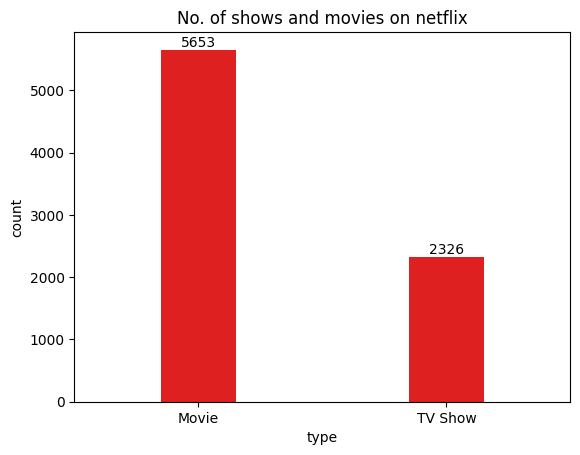

In [250]:
img = sns.countplot(data=df,x="type",color='r',order=df["type"].value_counts().index,width=0.3)
img.set_title("No. of shows and movies on netflix")
img.bar_label(img.containers[0], fontsize=10)
plt.show()

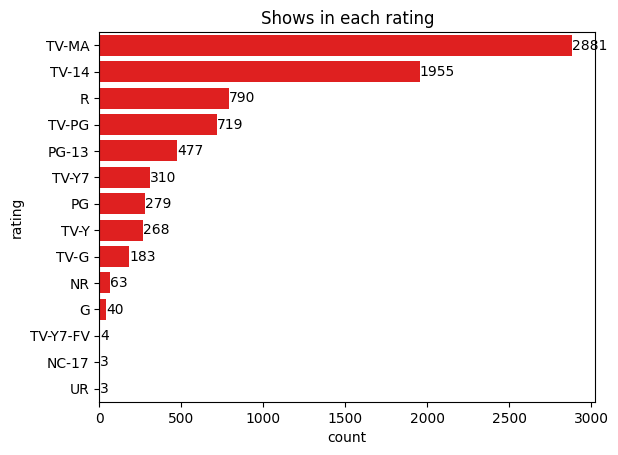

In [251]:
img = sns.countplot(data=df,y="rating",color='r',order = df["rating"].value_counts().index)
img.bar_label(img.containers[0], fontsize=10)
img.set_title("Shows in each rating")
plt.show()

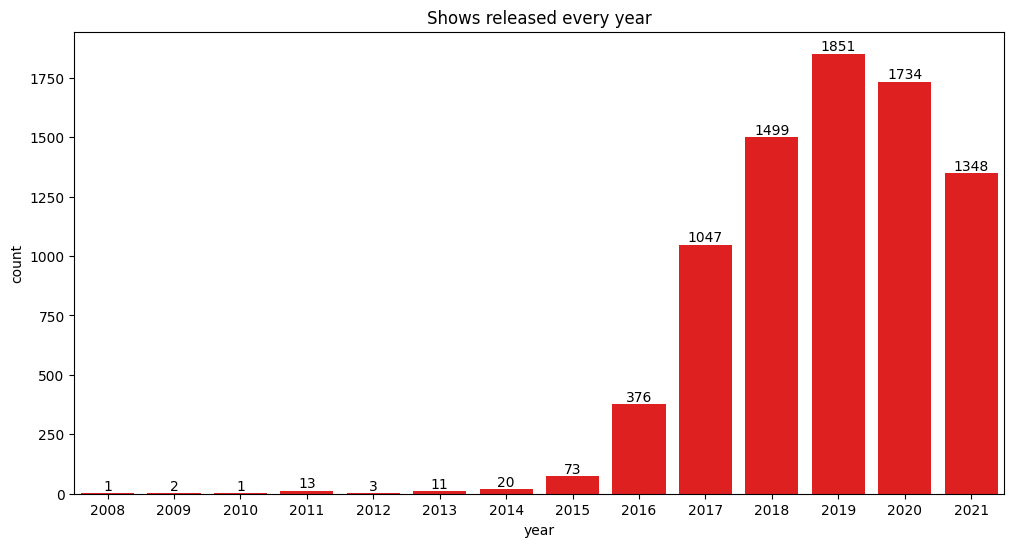

In [252]:
fig,img = plt.subplots(figsize=(12,6))
img = sns.countplot(data=df,x="year",color='r',order=sorted(df["year"].dropna().unique()))
img.bar_label(img.containers[0], fontsize=10)
img.set_title("Shows released every year")
plt.show()

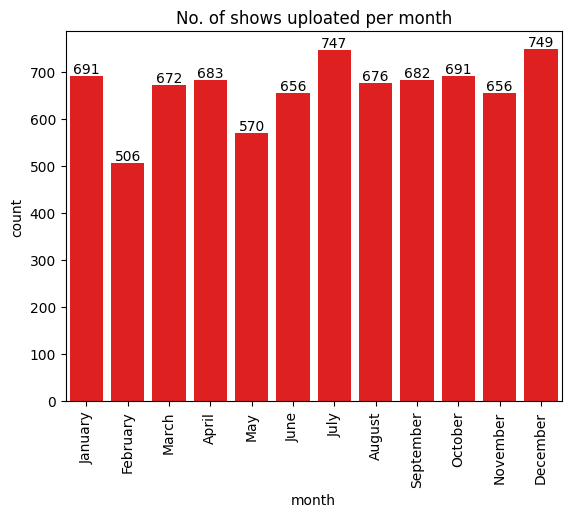

In [253]:
month = ["January","February","March","April","May","June","July","August","September","October","November","December"]
img = sns.countplot(data=df,x="month",color="r",order=month)
img.set_title("No. of shows uploated per month")
img.bar_label(img.containers[0], fontsize = 10)
img.tick_params(axis="x",rotation=90)
plt.show()

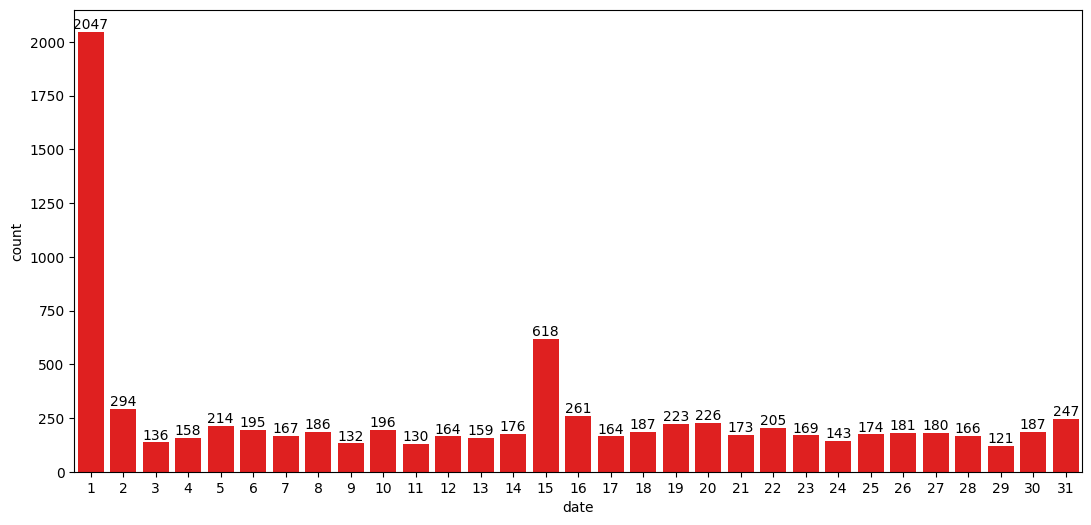

In [254]:
fig,img = plt.subplots(figsize=(13,6))
img = sns.countplot(data=df,x="date",order = sorted(df["date"].dropna().unique()),color="r")
img.set_title = ("Datewise upload of shows")
img.bar_label(img.containers[0], fontsize=10)
plt.show()

In [255]:
country = df["country"].value_counts().head(10)

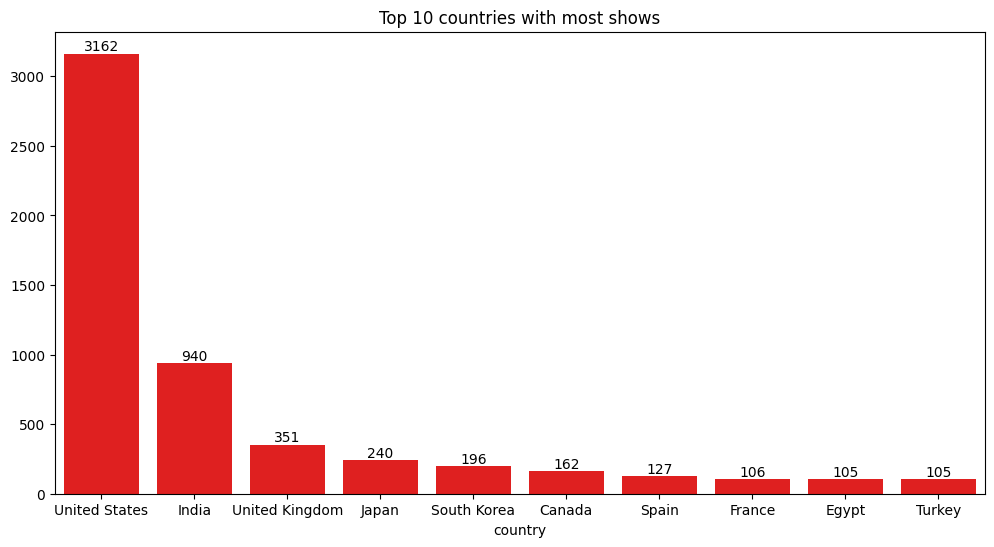

In [256]:
fig, img = plt.subplots(figsize=(12,6))
img = sns.barplot(x=country.index,y=country.values,color="r")
img.set_title("Top 10 countries with most shows")
img.bar_label(img.containers[0], fontsize=10)
plt.show()

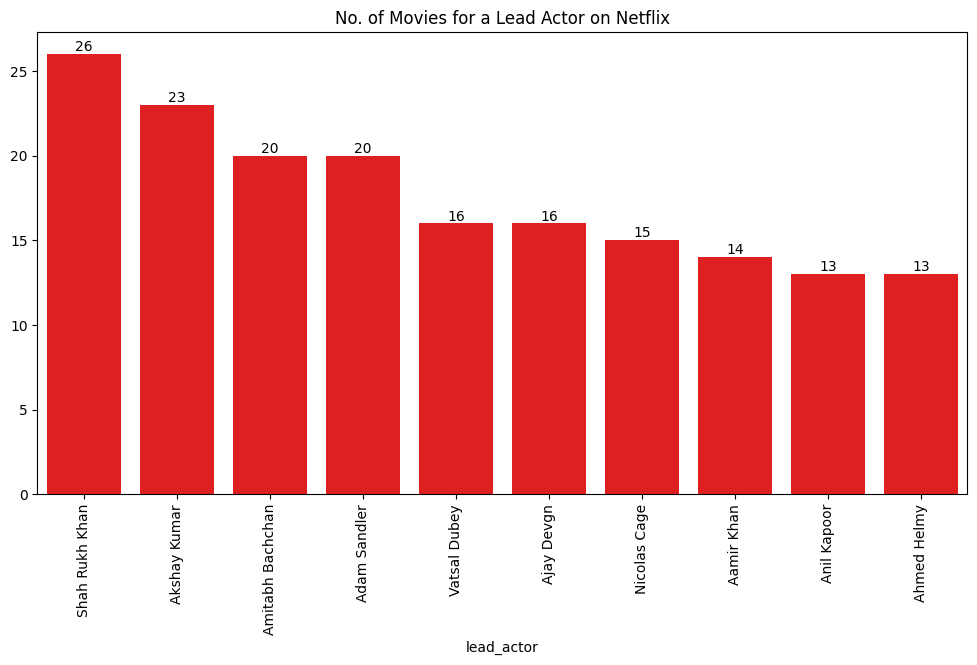

In [261]:
movie_count = movie_df["lead_actor"].value_counts().head(10) 
fig, img = plt.subplots(figsize=(12, 6))
img = sns.barplot(x=movie_count.index, y=movie_count.values, color="r")
img.set_title("No. of Movies for a Lead Actor on Netflix")
img.tick_params(axis='x', rotation=90)
img.bar_label(img.containers[0], fontsize=10)
plt.show()

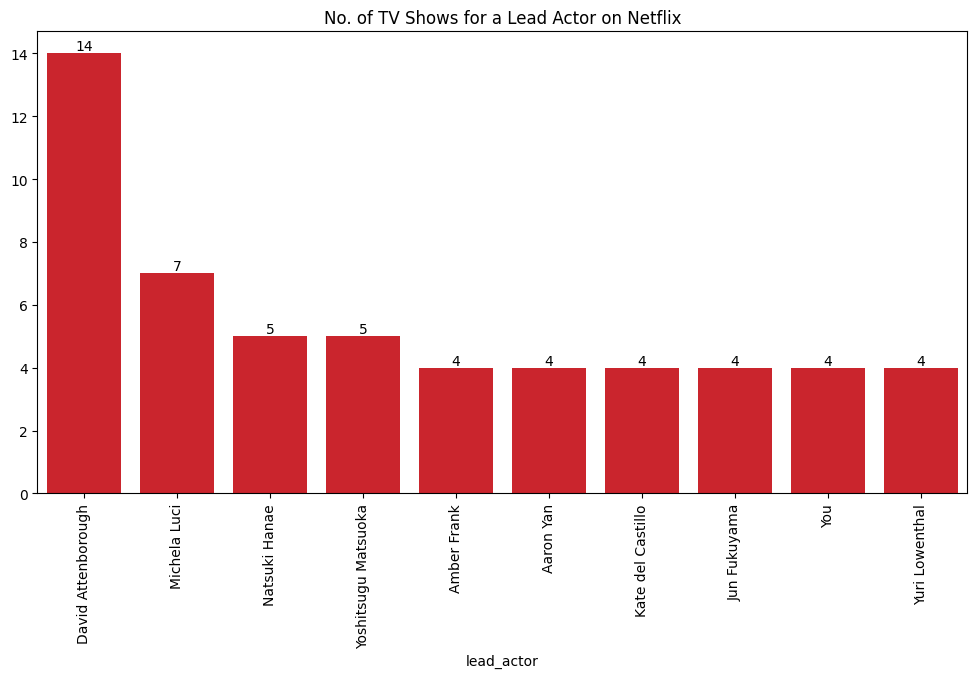

In [257]:
tv_actor = tv_df["lead_actor"].value_counts().head(10)
fig, img = plt.subplots(figsize=(12, 6))
img = sns.barplot(x=tv_actor.index, y=tv_actor.values, color="r")
img.set_title("No. of TV Shows for a Lead Actor on Netflix")
img.tick_params(axis='x', rotation=90)
img.bar_label(img.containers[0], fontsize=10)
plt.show()

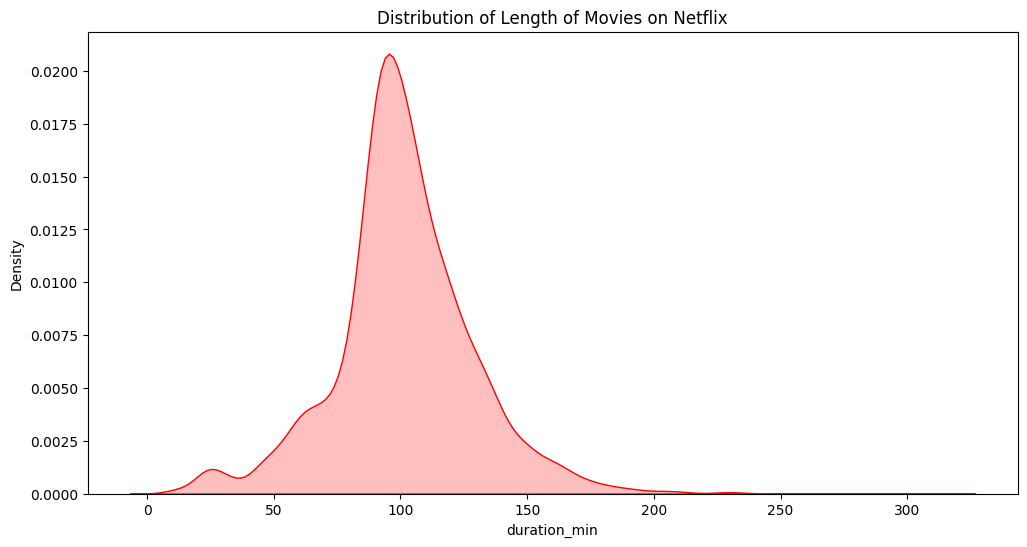

In [258]:
fig, img = plt.subplots(figsize=(12, 6))
img = sns.kdeplot(movie_df["duration_min"], color="r", fill=True)
img.set_title("Distribution of Length of Movies on Netflix")
plt.show()

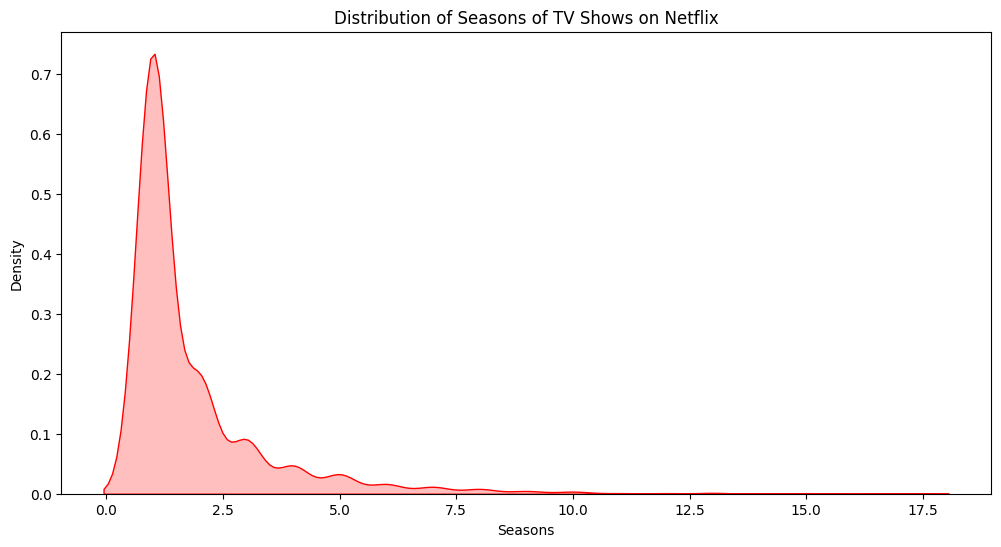

In [259]:
fig, img = plt.subplots(figsize=(12, 6))
img = sns.kdeplot(tv_df["Seasons"], color="r", fill=True)
img.set_title("Distribution of Seasons of TV Shows on Netflix")
plt.show()